Imports necessary libraries and packages.

In [242]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.image as pltimg
import requests

Takes the crime data csv file then uses the address with the Google Geocoding API (using my API key) to get the Latitude and Longitude. Also classifies the data as "Violent" = 0 or "Non-Violent" = 1. May take a few minutes depending on the amount of crimes.

In [287]:
crime_data = pd.read_csv(r"Miami_Dade_0.csv")

crime_data_clf = pd.DataFrame(columns=["Description", "Latitude","Longitude","Class"])
crime_data_clf["Description"] = crime_data["Description"]

def crime_classifier(description):
    switcher = {
        'ASSAULT':0,
        'HOMICIDE':0,
        'ARMED ROBBERY - FIREARM OR OTHER DEADLY WEAPON':0,
        'BATTERY / AGG: WITH A FIREARM OR DEADLY DEVICE (DOMESTIC VIOLENCE)':0,
        'SIMPLE BATTERY':0,
        'BATTERY / AGG / DOMESTIC: VICTIM PREGNANT (MINOR, NO WEAPON OR NO INJURY - NO LOSS OF FETUS)':0,
        'ASSAULT / AGG / DOMESTIC':0,
        'ARSON':0,
        'WEAPONS':0,
        'BATTERY / DOMESTIC':0
    }
    return switcher.get(description, 1)

def geocoding_and_classifier(c_data, c_output):
    for i in range(len(c_data)):
        crime_address = c_data.iloc[i,3].split()
        crime_address = '+'.join(crime_address)
        api_key = "personal key"

        loc_request = (r"https://maps.googleapis.com/maps/api/geocode/json?address=" + crime_address + api_key)
        loc_response = requests.get(loc_request)

        temp = loc_response.json()
        if temp["status"] == 'OK':
            c_output.iloc[i,1] = temp["results"][0]["geometry"]["location"]["lat"]
            c_output.iloc[i,2] = temp["results"][0]["geometry"]["location"]["lng"]
        
        c_output.iloc[i,3] = crime_classifier(c_output.iloc[i,0])
    c_output = c_output.dropna()
    return c_output

crime_data_clf = geocoding_and_classifier(crime_data, crime_data_clf)
#Classified and Geolocated Crime Data
crime_data_clf

,Description,Latitude,Longitude,Class
0,SIMPLE BATTERY,25.8107,-80.3256,0
1,ASSAULT,25.848,-80.25,0
2,BURGLARY - OTHER STRUCTURE,26.6961,-82.0107,1
3,BURGLARY - OTHER STRUCTURE,26.6961,-82.0107,1
4,BATTERY / DOMESTIC,26.6615,-82.0145,0
...,...,...,...,...
858,BATTERY / DOMESTIC,25.7723,-80.2317,0
859,BURGLARY,25.6075,-80.3483,1
860,ASSAULT,25.6676,-80.4349,0
861,THEFT/LARCENY,25.8017,-80.2004,1


Removes any outliers from the classified crime data and prints the max/min longitude and latitude.

In [288]:
crime_data_clf = crime_data_clf[(crime_data_clf['Longitude']<=-80.1)&(crime_data_clf['Latitude']>=-80.65)]
crime_data_clf = crime_data_clf[(crime_data_clf['Latitude']<=25.98)&(crime_data_clf['Latitude']>=25.43)]
print("Max Latitude:", crime_data_clf['Latitude'].max())
print("Min Latitude:", crime_data_clf['Latitude'].min())
print("Max Longitude:", crime_data_clf['Longitude'].max())
print("Min Longitude:", crime_data_clf['Longitude'].min())
crime_data_clf

Max Latitude: 25.9797967
Min Latitude: 25.5713513
Max Longitude: -80.1256105
Min Longitude: -80.5109871


,Description,Latitude,Longitude,Class
0,SIMPLE BATTERY,25.8107,-80.3256,0
1,ASSAULT,25.848,-80.25,0
5,SIMPLE BATTERY,25.7492,-80.2589,0
6,VANDALISM,25.8716,-80.2143,1
7,VEHICLE BREAK-IN/THEFT,25.8075,-80.3193,1
...,...,...,...,...
858,BATTERY / DOMESTIC,25.7723,-80.2317,0
859,BURGLARY,25.6075,-80.3483,1
860,ASSAULT,25.6676,-80.4349,0
861,THEFT/LARCENY,25.8017,-80.2004,1


Uses an HTTP request with the Census API to get the Gini indices for each county subdivision.

In [171]:
response = requests.get("https://api.census.gov/data/2019/acs/acs5/?get=NAME,B19083_001E&for=county%20subdivision:*&in=state:12&in=county:086")
print(response.json())
gini_data = response.json()
gini_df = pd.DataFrame(gini_data[1:], columns=gini_data[0])
gini_df = gini_df.iloc[:,:2]

[['NAME', 'B19083_001E', 'state', 'county', 'county subdivision'], ['Kendale Lakes-Tamiami CCD, Miami-Dade County, Florida', '0.4170', '12', '086', '91705'], ['Miami Gardens CCD, Miami-Dade County, Florida', '0.4110', '12', '086', '92175'], ['Everglades CCD, Miami-Dade County, Florida', '0.3463', '12', '086', '91040'], ['Miami CCD, Miami-Dade County, Florida', '0.5534', '12', '086', '92158'], ['Homestead CCD, Miami-Dade County, Florida', '0.4414', '12', '086', '91534'], ['Miami Beach CCD, Miami-Dade County, Florida', '0.5919', '12', '086', '92171'], ['North Westside CCD, Miami-Dade County, Florida', '0.4266', '12', '086', '92470'], ['Princeton-Goulds CCD, Miami-Dade County, Florida', '0.4415', '12', '086', '92886'], ['Hialeah CCD, Miami-Dade County, Florida', '0.4728', '12', '086', '91482'], ['Key Biscayne CCD, Miami-Dade County, Florida', '0.5207', '12', '086', '91729'], ['South Westside CCD, Miami-Dade County, Florida', '0.4728', '12', '086', '93211'], ['Kendall-Palmetto Bay CCD, Mia

In [ ]:
Defines the borders of each county subdivision.

In [180]:
gini_df = gini_df.assign(X1=[-80.6,0,-80.65,-80.25,-80.6,-80.15,-80.5,-80.6,-80.35,-80.25,-80.55,-80.35],
                         X2=[-80.5,0,-80.6,-80.15,-80.1,-80.1,-80.35,-80.1,-80.25,-80.1,-80.35,-80.25],
                         Y1=[25.63,0,25.43,25.73,25.43,25.73,25.73,25.53,25.78,25.63,25.63,25.63],
                         Y2=[25.98,0,25.98,25.98,25.53,25.98,25.98,25.63,25.98,25.73,25.73,25.78])
gini_df

,NAME,B19083_001E,X1,X2,Y1,Y2
0,"Kendale Lakes-Tamiami CCD, Miami-Dade County, ...",0.4170,-80.60,-80.50,25.63,25.98
1,"Miami Gardens CCD, Miami-Dade County, Florida",0.4110,0.00,0.00,0.00,0.00
2,"Everglades CCD, Miami-Dade County, Florida",0.3463,-80.65,-80.60,25.43,25.98
3,"Miami CCD, Miami-Dade County, Florida",0.5534,-80.25,-80.15,25.73,25.98
4,"Homestead CCD, Miami-Dade County, Florida",0.4414,-80.60,-80.10,25.43,25.53
5,"Miami Beach CCD, Miami-Dade County, Florida",0.5919,-80.15,-80.10,25.73,25.98
6,"North Westside CCD, Miami-Dade County, Florida",0.4266,-80.50,-80.35,25.73,25.98
7,"Princeton-Goulds CCD, Miami-Dade County, Florida",0.4415,-80.60,-80.10,25.53,25.63
8,"Hialeah CCD, Miami-Dade County, Florida",0.4728,-80.35,-80.25,25.78,25.98
9,"Key Biscayne CCD, Miami-Dade County, Florida",0.5207,-80.25,-80.10,25.63,25.73


Initializes the grid dataframe, specifying the boundaries for each grid square.

In [160]:
grid_df = pd.DataFrame({'X1':[],'X2':[],'Y1':[],'Y2':[],'Total Crime':[],'Violent Crime':[],'Gini Index':[]})

x_vals = np.arange(-80.65,-80.1,0.05)
y_vals = np.arange(25.43,25.98,0.05)
for i in range(11):
    for j in range(11):
        new_row = {'X1':x_vals[i], 'X2':x_vals[i+1], 'Y1':y_vals[j], 'Y2':y_vals[j+1]}
        grid_df = grid_df.append(new_row, ignore_index=True)
            

,X1,X2,Y1,Y2,Total Crime,Violent Crime,Gini Index
0,-80.65,-80.6,25.43,25.48,NaN,NaN,NaN
1,-80.65,-80.6,25.48,25.53,NaN,NaN,NaN
2,-80.65,-80.6,25.53,25.58,NaN,NaN,NaN
3,-80.65,-80.6,25.58,25.63,NaN,NaN,NaN
4,-80.65,-80.6,25.63,25.68,NaN,NaN,NaN
...,...,...,...,...,...,...,...
116,-80.15,-80.1,25.73,25.78,NaN,NaN,NaN
117,-80.15,-80.1,25.78,25.83,NaN,NaN,NaN
118,-80.15,-80.1,25.83,25.88,NaN,NaN,NaN
119,-80.15,-80.1,25.88,25.93,NaN,NaN,NaN


Assigns the Gini index and the total number of crimes/violent crimes within each grid square.

In [212]:
grid_df.iloc[:,6] = 0.52
for i in range(121):
    for j in range(12):
        if (grid_df.iloc[i,0]>=gini_df.iloc[j,2])&(grid_df.iloc[i,1]<=gini_df.iloc[j,3])&(grid_df.iloc[i,2]>=gini_df.iloc[j,4])&(grid_df.iloc[i,3]<=gini_df.iloc[j,5]):
            grid_df.iloc[i,6] = float(gini_df.iloc[j,1])

In [295]:
grid_df['Total Crime'] = 0
grid_df['Violent Crime'] = 0
grid_df['CLass'] = 0

for i in range(len(crime_data_clf)):
    for j in range(121):
        if (crime_data_clf.iloc[i,2]>=grid_df.iloc[j,0])&(crime_data_clf.iloc[i,2]<=grid_df.iloc[j,1])&(crime_data_clf.iloc[i,1]>=grid_df.iloc[j,2])&(crime_data_clf.iloc[i,1]<=grid_df.iloc[j,3]):
            grid_df.iloc[j,4] += 1
            if crime_data_clf.iloc[i,3] == 0: grid_df.iloc[j,5] += 1

# Classifies the grid squares based on Total Crime, Violent Crime, and Gini index
for i in range(len(grid_df)):
    if (grid_df.iloc[i,4]>=50)|(grid_df.iloc[i,6]>0.52):
        grid_df.iloc[i,7] = 0
    elif (grid_df.iloc[i,4]>=30)|(grid_df.iloc[i,6]>0.45):
        grid_df.iloc[i,7] = 1
    else:
        grid_df.iloc[i,7] = 2
                
print(grid_df.to_string())

        X1     X2     Y1     Y2  Total Crime  Violent Crime Gini Index  CLass
0   -80.65 -80.60  25.43  25.48            0              0     0.3463      2
1   -80.65 -80.60  25.48  25.53            0              0     0.3463      2
2   -80.65 -80.60  25.53  25.58            0              0     0.3463      2
3   -80.65 -80.60  25.58  25.63            0              0     0.3463      2
4   -80.65 -80.60  25.63  25.68            0              0     0.3463      2
5   -80.65 -80.60  25.68  25.73            0              0     0.3463      2
6   -80.65 -80.60  25.73  25.78            0              0     0.3463      2
7   -80.65 -80.60  25.78  25.83            0              0     0.3463      2
8   -80.65 -80.60  25.83  25.88            0              0     0.3463      2
9   -80.65 -80.60  25.88  25.93            0              0     0.3463      2
10  -80.65 -80.60  25.93  25.98            0              0       0.52      1
11  -80.60 -80.55  25.43  25.48            0              0     

Creates the Decision Tree.

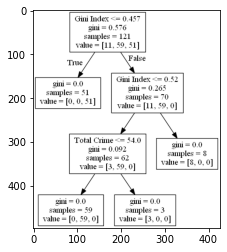

In [291]:
import pydotplus
features = ['Total Crime','Violent Crime','Gini Index']
X = grid_df[features]
Y = grid_df['CLass']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
tree_data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(tree_data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

Creates the color-coded grid over a map of the metropolitan areas of Miami-Dade County.

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1], [2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1], [2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1], [2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1], [2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1], [2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0], [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]]


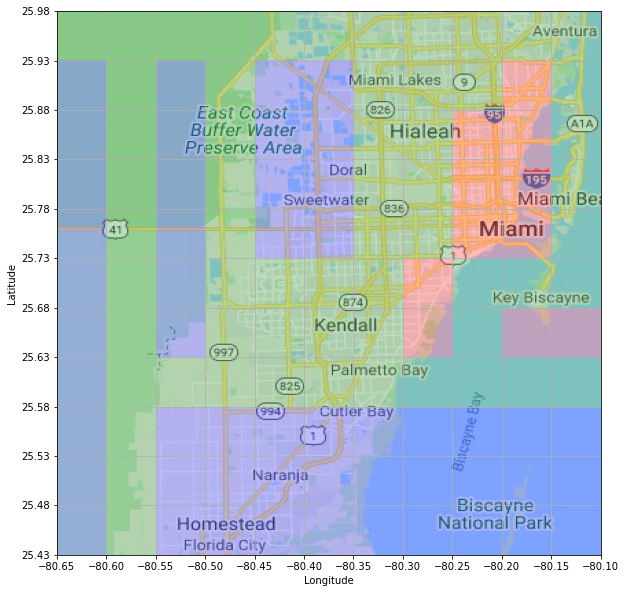

In [292]:
from matplotlib.colors import ListedColormap, LogNorm

fig = plt.figure(figsize=(10,10))
miami_grid = fig.add_subplot(1,1,1)
img = plt.imread("Miami Map 2.jpg")

x = np.arange(-80.65,-80.1,0.05) 
y = np.arange(25.43,25.98,0.05)
cmap = ListedColormap(["red", "green", "blue"])
#X, Y = np.meshgrid(x,y)  
res = [[],[],[],[],[],[],[],[],[],[],[]]
k=0
for i in range(11):
    for j in range(11):
        res[-(j+1)].append(grid_df.iloc[k,7])
        k+=1
    
print(res)

miami_grid.set_xlim(-80.65,-80.1)
miami_grid.set_ylim(25.43,25.98)
miami_grid.set_xlabel("Longitude")
miami_grid.set_ylabel("Latitude")
miami_grid.imshow(res, extent=[-80.65,-80.1,25.43,25.98], cmap=cmap)
miami_grid.imshow(img, extent=[-80.65,-80.1,25.43,25.98],alpha=0.75)

miami_grid.grid(which='major', axis='both', linestyle='-')
miami_grid.set_xticks(np.arange(-80.65,-80.1,0.05))
miami_grid.set_yticks(np.arange(25.43,25.98,0.05))
#miami_grid.scatter(data['Longitude'],data['Latitude'])
plt.show()